In [1]:
!pip install torch torchvision

Epoch [1/10], Loss: 0.8951, Accuracy: 75.04%
Epoch [2/10], Loss: 0.4069, Accuracy: 88.02%
Epoch [3/10], Loss: 0.3836, Accuracy: 88.66%
Epoch [4/10], Loss: 0.3823, Accuracy: 88.69%
Epoch [5/10], Loss: 0.3766, Accuracy: 88.95%
Epoch [6/10], Loss: 0.3715, Accuracy: 89.20%
Epoch [7/10], Loss: 0.3718, Accuracy: 89.20%
Epoch [8/10], Loss: 0.3726, Accuracy: 89.29%
Epoch [9/10], Loss: 0.3735, Accuracy: 89.15%
Epoch [10/10], Loss: 0.3720, Accuracy: 89.23%


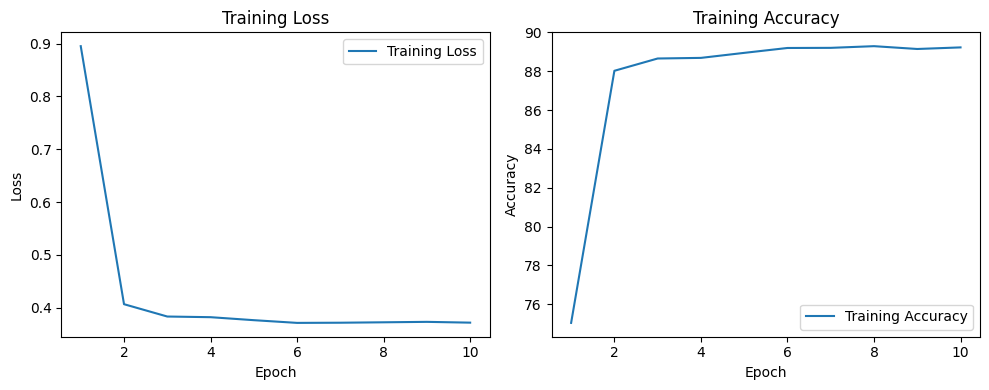

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(128, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return encoded, decoded

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)

# Train the autoencoder
autoencoder = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

for epoch in range(10):  # Adjust the number of epochs as needed
    for data in train_loader:
        inputs, _ = data
        inputs = inputs.view(inputs.size(0), -1)
        optimizer.zero_grad()
        _, outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

# Extract features using the encoder
encoder = autoencoder.encoder

# Define the classification head
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(128, 10)  # Adjust the output size for your classification task

    def forward(self, x):
        x = self.fc(x)
        return x

# Load the MNIST dataset again for classification
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)

# Combine the encoder and classifier
classifier = Classifier()
optimizer_classifier = optim.Adam(classifier.parameters(), lr=0.001)
# Lists to store training history
train_loss_history = []
train_acc_history = []

for epoch in range(10):  # Adjust the number of epochs as needed
    running_loss = 0.0
    correct = 0
    total = 0

    for data in train_loader:
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)
        optimizer_classifier.zero_grad()
        encoded = encoder(inputs)
        outputs = classifier(encoded)
        loss = nn.CrossEntropyLoss()(outputs, labels)
        loss.backward()
        optimizer_classifier.step()

        # Calculate training loss
        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_loss = running_loss / len(train_loader)
    train_accuracy = 100.0 * correct / total
    train_loss_history.append(train_loss)
    train_acc_history.append(train_accuracy)

    print(f'Epoch [{epoch + 1}/10], Loss: {train_loss:.4f}, Accuracy: {train_accuracy:.2f}%')

# Plot training loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), train_loss_history, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 11), train_acc_history, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Now, you can use the combined model (encoder + classifier) for classification.

## Pre-trained:

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (_, _) = keras.datasets.mnist.load_data()
train_images = train_images / 255.0  # Normalize pixel values to the range [0, 1]

# Resize the images to (224, 224) and add a channel dimension
train_images = tf.image.resize(train_images[..., tf.newaxis], (32, 32))


# Convert grayscale to RGB
train_images_rgb = tf.image.grayscale_to_rgb(train_images)


2023-11-14 17:32:44.341041: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-14 17:32:44.462200: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-14 17:32:44.462223: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-14 17:32:44.462829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-14 17:32:44.509993: I tensorflow/core/platform/cpu_feature_g

Epoch 1/10
938/938 [==============================] - 237s 248ms/step - loss: 0.8844 - accuracy: 0.7519
Epoch 2/10
938/938 [==============================] - 225s 240ms/step - loss: 0.4867 - accuracy: 0.8604
Epoch 3/10
938/938 [==============================] - 228s 243ms/step - loss: 0.3953 - accuracy: 0.8847
Epoch 4/10
938/938 [==============================] - 224s 239ms/step - loss: 0.3492 - accuracy: 0.8983
Epoch 5/10
938/938 [==============================] - 226s 240ms/step - loss: 0.3191 - accuracy: 0.9055
Epoch 6/10
938/938 [==============================] - 225s 240ms/step - loss: 0.2971 - accuracy: 0.9115
Epoch 7/10
938/938 [==============================] - 238s 254ms/step - loss: 0.2822 - accuracy: 0.9156
Epoch 8/10
938/938 [==============================] - 226s 241ms/step - loss: 0.2675 - accuracy: 0.9197
Epoch 9/10
938/938 [==============================] - 225s 240ms/step - loss: 0.2582 - accuracy: 0.9219
Epoch 10/10
938/938 [==============================] - 226s 241m

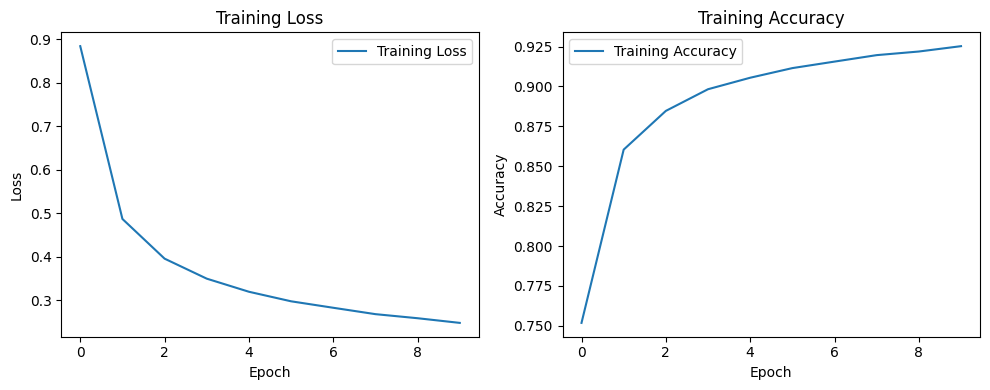

In [30]:

# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_images_rgb, train_labels))
train_dataset = train_dataset.shuffle(buffer_size=60000).batch(64)

# Load a pre-trained ResNet-18 model (excluding the final classification layer)
base_model = tf.keras.applications.ResNet50(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet',
)
base_model.trainable = False  # Freeze the pre-trained layers

# Add a custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation='softmax')  # Adjust the output size for your classification task
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model (fine-tuning)
history = model.fit(train_dataset, epochs=10)

# Plot training loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()
